# Pre Loading Libraries

In [ ]:
!pip install -q -U tensorflow-text
!pip install -q tf-models-official
!pip install tensorflow_hub
!pip install transformers
!pip install scikit-plot

     |████████████████████████████████| 4.9 MB 5.0 MB/s 
     |████████████████████████████████| 462 kB 48.0 MB/s 
     |████████████████████████████████| 2.2 MB 5.3 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 99 kB 4.9 MB/s 
     |████████████████████████████████| 352 kB 12.6 MB/s 
     |████████████████████████████████| 1.1 MB 39.3 MB/s 
     |████████████████████████████████| 47.8 MB 34 kB/s 
     |████████████████████████████████| 636 kB 13.5 MB/s 
     |████████████████████████████████| 1.2 MB 46.2 MB/s 
     |████████████████████████████████| 237 kB 38.9 MB/s 
     |████████████████████████████████| 90 kB 7.5 MB/s 
ERROR: Operation cancelled by user


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Data Loading & Exploration

In [ ]:
df = pd.read_csv('train.csv')
display(df.head())
display(df.info())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

In [ ]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

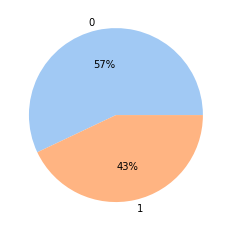

In [ ]:
import seaborn as sns

#define data
data = [4342, 3271]
labels = ['0', '1']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


In [ ]:
print(df['keyword'].unique())
print(df['location'].unique())


[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'droug

In [ ]:
df = df.drop(['id', 'keyword','location'], axis = 1)
df.head()


,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


# Data Cleaning

**Make Characters to Lower Case**

In [ ]:
df["CleanText"] = df["text"].apply(lambda x: x.lower())
df.head()

,text,target,CleanText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


**Remove non-characters : URL,HTML,Emojis, punctuation, **

In [ ]:
#remove URL

df["CleanText"] = df["CleanText"].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", "",x))


In [ ]:
def removeHTML(text):
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

df["CleanText"] = df["CleanText"].apply(lambda x: removeHTML(x))


In [ ]:
def removeEmojis(text):
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                       "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df["CleanText"] = df["CleanText"].apply(lambda x: removeEmojis(x))


In [ ]:
def RemovePunctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
df["CleanText"] = df["CleanText"].apply(lambda x: RemovePunctuation(x))


In [ ]:
def RemoveASCII(text):
  return re.sub(r'[^\x00-\x7f]', "", text)

df["CleanText"] = df["CleanText"].apply(lambda x: RemoveASCII(x))

In [ ]:
df.head()


,id,text,target,CleanText
0,1,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


# Data Preprocessing Part1 ([NLTK](https://www.nltk.org/index.html)) 

**Tokenizer**

In [ ]:
df['TokenizedText'] = df['CleanText'].apply(nltk.word_tokenize)
df.head()


,text,target,CleanText,TokenizedText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


**Remove Stopwords**

In [ ]:
stop = set(stopwords.words('english'))
df['RemoveStopWords'] = df['TokenizedText'].apply(lambda x: [word for word in x if word not in stop])
df.head()


,text,target,CleanText,TokenizedText,RemoveStopWords
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


**PorterStemmer**

What is PorterStemmer in NLP?
Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

In [ ]:
def doPorterStemmer(text):
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

df['PorterStemmer'] = df['RemoveStopWords'].apply(lambda x: doPorterStemmer(x))
df.head()

,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]"
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."


***WordNetLemmatizer***

In [ ]:
def doLemmatizeWord(text):
    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word) for word in text]
    return lemma

df['LemmatizedText'] = df['RemoveStopWords'].apply(lambda x: doLemmatizeWord(x))
df.head()


,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer,LemmatizedText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [ ]:
df['FINAL']=df['LemmatizedText'].apply(lambda x: ''.join(i+' ' for i in x))
df.head()

,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer,LemmatizedText,FINAL
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of...",resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...


# Data PreProcessing Part2 to transform text to Numerical data




**We will make three different numerical datasets**

**CounterVector**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range = (1,1))
cv_df = vectorizer.fit_transform(df['FINAL'])

vectorizer.get_feature_names_out()
print(cv_df.shape)

(7613, 16270)


In [ ]:
cv_df.shape

(7613, 16270)

**TF-IDF**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfvectorizer = TfidfVectorizer(ngram_range = (1,2))
tfidf_df = tfvectorizer.fit_transform(df['FINAL'])
print(tfidf_df.shape)


(7613, 63245)


**Word2Vec**

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
import nltk
import multiprocessing

In [ ]:
sentences = df['FINAL'].values
sentences = [nltk.word_tokenize(title) for title in sentences]

In [ ]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer


w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)


In [ ]:
w2v_model.build_vocab(sentences, progress_per=10000)

In [ ]:
#As we do not plan to train the model any further, we are calling init_sims(), which will make the model much more memory-efficient:

w2v_model.init_sims(replace=True)

In [ ]:
w2v_model.wv.similarity("fire", 'wildfire')


-0.046445925

In [ ]:
w2v_model.wv.most_similar(positive=["evacuation"])

[('lonepine', 0.21908968687057495),
 ('failed', 0.19901712238788605),
 ('652', 0.1980876475572586),
 ('50', 0.19096240401268005),
 ('provider', 0.18938955664634705),
 ('died', 0.18638795614242554),
 ('flour', 0.18604536354541779),
 ('karnakarank', 0.18402345478534698),
 ('rosewell', 0.1790338009595871),
 ('fwy', 0.17826204001903534)]

In [ ]:
w2v_model.wv.most_similar(positive=["injury"])

[('itsllikely', 0.20361730456352234),
 ('align', 0.2015061378479004),
 ('isi', 0.20030298829078674),
 ('xboxone', 0.193654403090477),
 ('dirktrossen', 0.19278356432914734),
 ('savour', 0.18836794793605804),
 ('salem', 0.18790237605571747),
 ('epicinsanity', 0.18767592310905457),
 ('sonisoner', 0.18751327693462372),
 ('kc', 0.18614548444747925)]

In [ ]:
words = list(w2v_model.wv.vocab)
#print(words) 

In [ ]:
w2v_df = []
for sent in sentences:
    vw = np.zeros(300) 
    #one sentence has many words
    for word in sent:
        vw += w2v_model[word]
    #average
    vw = vw/len(sent)
    w2v_df.append(np.array(vw))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [ ]:
print(len(w2v_df))
print(w2v_model['earthquake'])

7613
[-7.22493569e-04 -5.11271122e-04 -6.01177220e-04  1.42486650e-03
 -6.70145615e-04 -6.71808782e-04  5.30274061e-04 -7.50338659e-04
 -1.44319201e-03 -1.27098092e-03  5.95566584e-04  5.97744016e-04
 -8.97939375e-04  1.36763265e-03 -6.86194748e-04  7.91859115e-04
 -7.14777387e-04  9.00714018e-04  1.15437445e-03  9.34742682e-04
 -1.13336928e-03  1.16967072e-03 -1.64625642e-03 -6.85185485e-04
 -6.89128181e-04 -1.33186724e-04 -1.62229140e-03  9.32629337e-05
  3.01346969e-04  1.52934319e-03  1.56668085e-03  1.27963792e-03
  1.08292338e-03  9.63663741e-04 -6.44324347e-04  4.40067553e-04
  3.60411475e-04 -6.98237214e-04 -3.86893720e-04  9.07197478e-04
 -2.46287644e-04 -4.09908273e-04 -1.62154867e-03 -9.55954718e-04
  4.40833770e-04 -1.51435926e-03  6.30006136e-04  8.72776611e-04
  2.01665694e-04  1.50140410e-03 -1.37190358e-03 -1.07446662e-03
  1.47533789e-03  2.44386960e-04 -4.62455850e-04 -4.18639480e-04
 -1.33319365e-04  8.17419859e-05  8.86104826e-04  8.57717823e-04
  3.44351691e-04  4.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


# Reduce Dimension PCA, SVD 

In [ ]:
from sklearn.preprocessing import StandardScaler
'''ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.'''
from sklearn.decomposition import PCA
'''TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.'''
from sklearn.decomposition import TruncatedSVD

trans_cv_df = StandardScaler(with_mean=False).fit_transform(cv_df)

#reduce dimention half
svd = TruncatedSVD(n_components=100)
svd_trans_cv_df = svd.fit_transform(trans_cv_df)

print(svd_trans_cv_df.shape)


(7613, 100)


In [ ]:

trans_tfidf_df = StandardScaler(with_mean=False).fit_transform(tfidf_df)
#reduce dimention half
svd = TruncatedSVD(n_components=100)
svd_trans_tfidf_df = svd.fit_transform(trans_tfidf_df)

print(svd_trans_tfidf_df.shape)


(7613, 100)


In [ ]:
trans_w2v_df = StandardScaler().fit_transform(w2v_df)

#reduce dimention half
pca = PCA(n_components=100)
pca_trans_w2v_df = pca.fit_transform(trans_w2v_df)

print(pca_trans_w2v_df.shape)

(7613, 100)


In [ ]:
from sklearn.model_selection import train_test_split

cv_train_X, cv_test_X, cv_train_Y, cv_test_y = train_test_split(cv_df, df['target'], test_size=0.30, random_state=17)
svd_cv_train_X, svd_cv_test_X, svd_cv_train_Y, svd_cv_test_y = train_test_split(svd_trans_cv_df, df['target'], test_size=0.30, random_state=17)

tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y = train_test_split(tfidf_df, df['target'], test_size=0.30, random_state=17)
svd_tfidf_train_X, svd_tfidf_test_X, svd_tfidf_train_Y, svd_tfidf_test_y = train_test_split(svd_trans_tfidf_df, df['target'], test_size=0.30, random_state=17)

w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y = train_test_split(w2v_df, df['target'], test_size=0.30, random_state=17)
pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y = train_test_split(pca_trans_w2v_df, df['target'], test_size=0.30, random_state=17)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

 
def model_SVM(train_X, test_X, train_y, test_y) :
  SVM = svm.SVC()
  SVM.fit(train_X, train_y)
  pred_y = SVM.predict(test_X)

  #Accuracy
  acurracy_SVM = accuracy_score(test_y, pred_y)
  print(acurracy_SVM)
  '''
  #confusion matrix
  confusion_matrix_SVM = confusion_matrix(test_y, pred_y)
  skplt.metrics.plot_confusion_matrix(test_y, pred_y, normalize=True)

  print('confusion_matrix_SVM: ', confusion_matrix_SVM)
  plt.show()
  '''

**Training three datasets on Basic SVM and Prediction/Accuracy**

Component = 100

In [ ]:
model_SVM(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_SVM(svd_cv_train_X, svd_cv_test_X, svd_cv_train_Y, svd_cv_test_y)

model_SVM(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_SVM(svd_tfidf_train_X, svd_tfidf_test_X, svd_tfidf_train_Y, svd_tfidf_test_y)

model_SVM(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
model_SVM(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)

0.7990367775831874
0.7215411558669002
0.76138353765324
0.6050788091068301
0.7373029772329247
0.7228546409807356


Component = 200

In [ ]:
model_SVM(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_SVM(svd_cv_train_X, svd_cv_test_X, svd_cv_train_Y, svd_cv_test_y)

model_SVM(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_SVM(svd_tfidf_train_X, svd_tfidf_test_X, svd_tfidf_train_Y, svd_tfidf_test_y)

model_SVM(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
model_SVM(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)

0.7990367775831874
0.7355516637478109
0.76138353765324
0.6401050788091068
0.7373029772329247
0.7324868651488616


**SVM with CounterVector has higher accuracy**

In [ ]:
def testModel(train_x, test_x, train_y, test_y, _c, _gam, _kn):
  SVM = svm.SVC(kernel=_kn, C=_c)
  SVM.fit(train_x, train_y)
  pred_y = SVM.predict(test_x)
  #Accuracy
  acurracy_SVM = accuracy_score(test_y, pred_y)
  print(acurracy_SVM)


'''
To find best tuning option

group_c = [5, 1, 0.1, 0.05, 0.01, 0.001]
group_gam = [5, 1, 0.1, 0.05, 0.01, 0.001]

for c in group_c:
  print("C value:", c)
  for gam in group_gam:
    print("gam value:", gam)
    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'rbf')
'''
#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'linear')
#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'rbf')
#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, 1, 'auto', 'poly')

testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, 1, 'auto', 'sigmoid')


0.7999124343257443
